<a href="https://colab.research.google.com/github/junsukha/pose-estimation-demo/blob/main/pose_estimation_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preaparing Dataset for Pose Estimation

    

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install mediapipe
import mediapipe as mp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 31.5 MB 69.4 MB/s 


In [ ]:
import cv2
import time
import numpy as np
import pandas as pd
import os


In [ ]:
mpPose = mp.solutions.pose
pose = mpPose.Pose()
mpDraw = mp.solutions.drawing_utils # for drawing keypoints
points = mpPose.PoseLandmark # Landmarks

In [32]:
data = []
for p in points:
  x = str(p)[13:]
  data.append(x + "_x")
  data.append(x + "_y")
  data.append(x + "_z")
  data.append(x + "_vis")
data = pd.DataFrame(columns = data) # Empty dataset

In [12]:
from google.colab.patches import cv2_imshow # cv2.imshow doesn't work in colab

In [33]:
path = "/content/drive/MyDrive/Colab Notebooks/cv-final-project/yoga-data-set/DATASET/TEST/plank" # enter dataset path
count = 0
for img in os.listdir(path):
  temp = []
  img = cv2.imread(path + "/" + img)
  imageWidth, imageHeight = img.shape[:2]
  imgRGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  blackie = np.zeros(img.shape) # Blank image
  results = pose.process(imgRGB) # extract key points
  if results.pose_landmarks:
    mpDraw.draw_landmarks(blackie, results.pose_landmarks, mpPose.POSE_CONNECTIONS)
    landmarks = results.pose_landmarks.landmark
    for i,j in zip(points, landmarks):
      temp = temp + [j.x, j.y, j.z, j.visibility]
    
    data.loc[count] = temp
    count+=1

  # cv2_imshow(img)
  # cv2_imshow(blackie)  
  # cv2.waitKey(100)
data.to_csv("dataset3.csv")

In [38]:
# data = pd.read_csv("dataset3.csv")
data['target'] = [1 if i == 1 else 0 for i in range(len(data.index) )]
# print(data['target'][:4])
data.to_csv("dataset4.csv")

## Create Pose Estimation model

In [17]:
from sklearn.svm import SVC

In [39]:
os.chdir("/content/drive/MyDrive/Colab Notebooks/cv-final-project")
%ls
data = pd.read_csv("dataset4.csv")

 dataset3.csv  'pose estimation demo.ipynb'   yoga-data-set.zip
 dataset4.csv   yoga-data-set/


plank


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


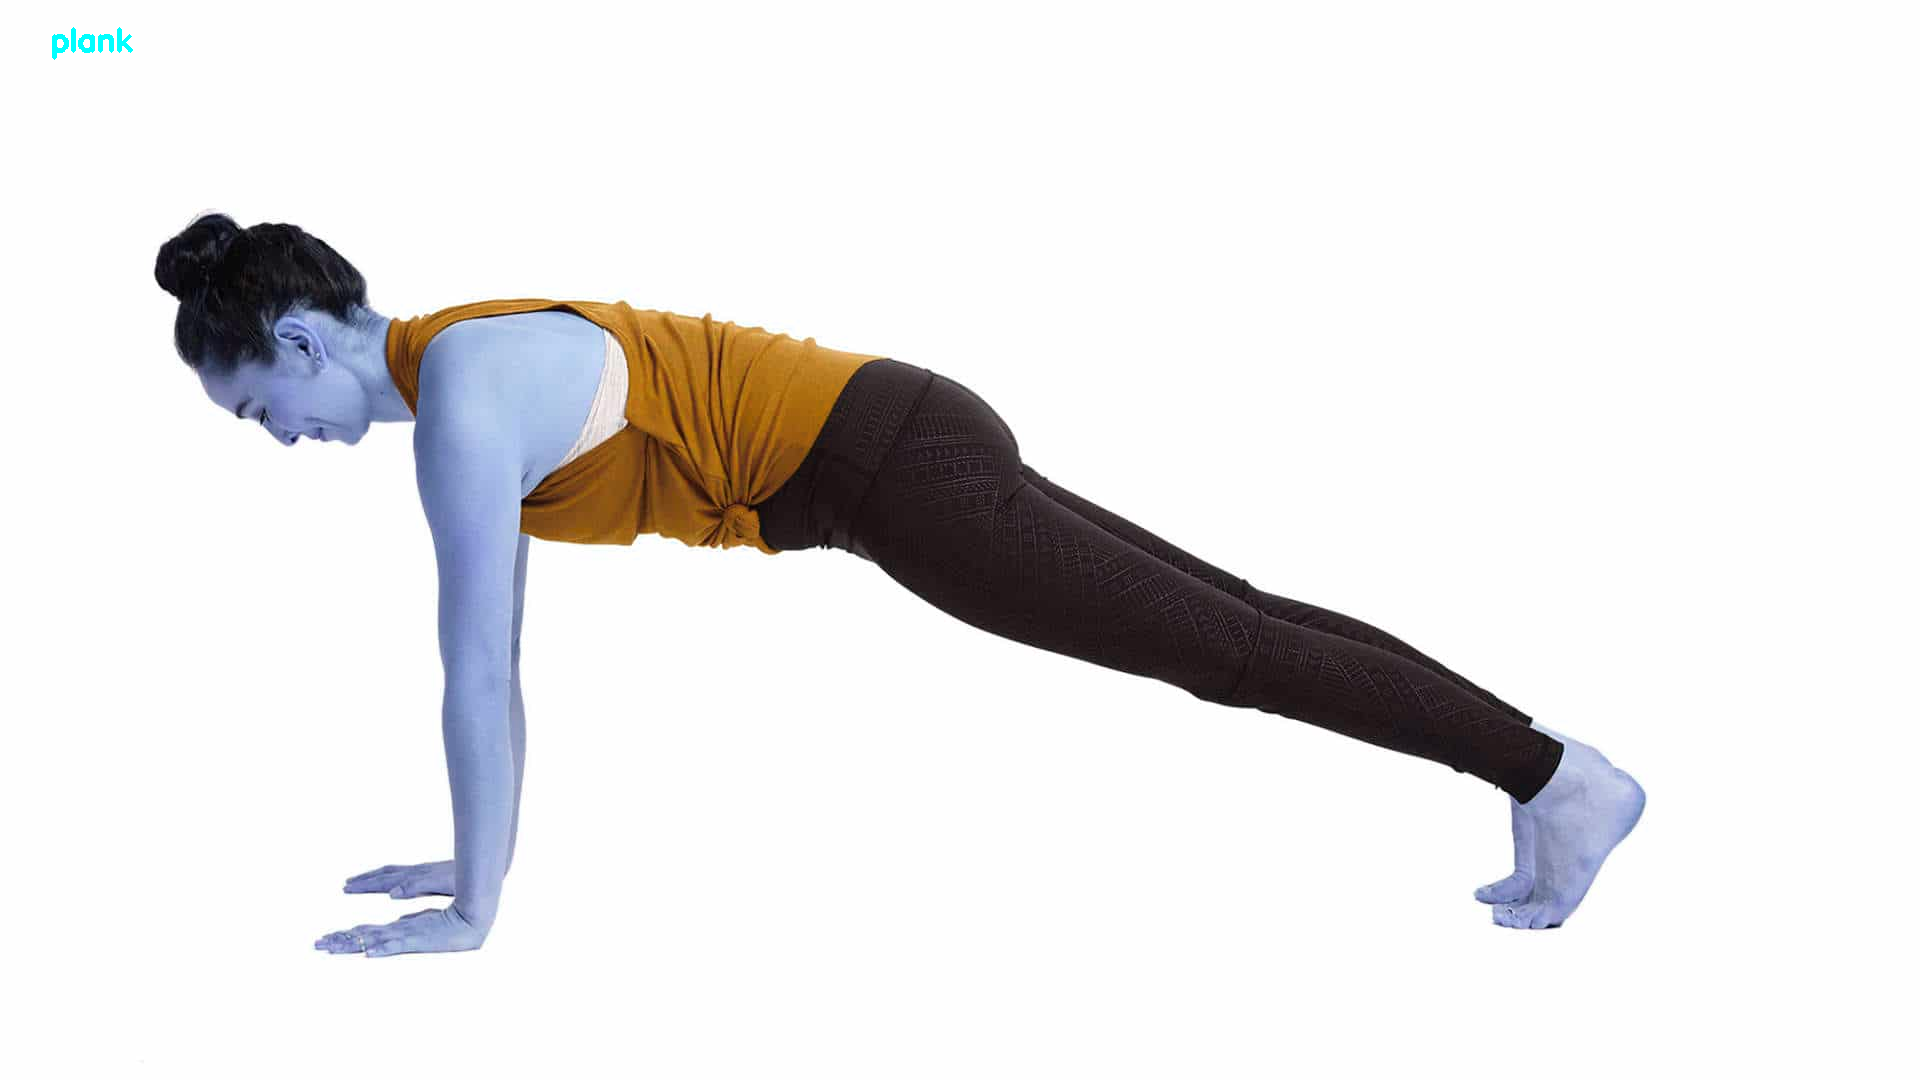

In [47]:
X, Y = data.iloc[:, :132], data['target']
model = SVC(kernel = 'poly')
model.fit(X, Y)
mpPose = mp.solutions.pose
mpDraw = mp.solutions.drawing_utils
path = "/content/drive/MyDrive/Colab Notebooks/cv-final-project/yoga-data-set/DATASET/TEST/plank/00000000.jpg"
img = cv2.imread(path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
results = pose.process(img)
if results.pose_landmarks:
  landmarks = results.pose_landmarks.landmark
  for j in landmarks:
    temp = temp + [j.x, j.y, j.z, j.visibility]
  y = model.predict([temp[:132]])
  if y == 0:
    asan = "plank"
  else:
    asan = "goddes"
  print(asan)
  cv2.putText(img, asan, (50,50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0),3)
  cv2_imshow(img)


